In [1]:
# %pip install scikit-learn

In [2]:
import pandas as pd

df = pd.read_csv('/projects/diffusion_bootcamp/datasets/ibmaml/HI-Small_Trans.csv')
df.head()


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


# Explore Data

In [3]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [4]:
print(len(set(df['Account'])))

print(df.shape)


print(len(set(df['Account.1'])))



496995
(5078345, 11)
420636


In [5]:
# Feature Engineering 1: identical account activity
df["Identitcal Account Activity"] = ((df["Account"] == df["Account.1"]) & (df["From Bank"] == df["To Bank"])).astype(int)


In [6]:
# ((df["Account"] == df["Account.1"]) & (df["From Bank"] == df["To Bank"]) & (df["Payment Format"] != "Reinvestment"))

filtered_df = df[
    (df['Account'] == df['Account.1']) &
    (df['From Bank'] == df['To Bank']) &
    (df['Payment Format'] != 'Reinvestment')
]

filtered_df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Identitcal Account Activity
105,2022/09/01 00:26,12,800043C00,12,800043C00,755.250000,US Dollar,755.250000,US Dollar,Cheque,0,1
106,2022/09/01 00:20,12,800043C00,12,800043C00,876.160000,US Dollar,876.160000,US Dollar,Credit Card,0,1
109,2022/09/01 00:20,10,800056660,10,800056660,4461.810000,US Dollar,4461.810000,US Dollar,Cheque,0,1
110,2022/09/01 00:03,10,800056660,10,800056660,1134.320000,US Dollar,1134.320000,US Dollar,Credit Card,0,1
111,2022/09/01 00:18,10,800056660,10,800056660,726.940000,US Dollar,726.940000,US Dollar,Cash,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5078269,2022/09/10 23:35,126,813B6E021,126,813B6E021,0.213793,Bitcoin,0.213793,Bitcoin,Bitcoin,0,1
5078270,2022/09/10 23:59,126,813B6E021,126,813B6E021,0.121724,Bitcoin,0.121724,Bitcoin,Bitcoin,0,1
5078271,2022/09/10 23:38,15,813B765F1,15,813B765F1,0.003384,Bitcoin,0.003384,Bitcoin,Bitcoin,0,1
5078272,2022/09/10 23:37,15,813B765F1,15,813B765F1,0.006543,Bitcoin,0.006543,Bitcoin,Bitcoin,0,1


In [7]:
# Feature Engineering 2: Timestamp normalization
df['Datetime'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %H:%M')
df["SecondsSinceEpoch"] = (df['Datetime'].astype(int) // 10**9)


In [8]:
# Final DF
feature_engineered_df = df[["SecondsSinceEpoch", "From Bank", "Account","To Bank","Account.1", "Identitcal Account Activity", "Amount Received", "Receiving Currency", "Amount Paid", "Payment Currency", "Payment Format", "Is Laundering"]]
feature_engineered_df

,SecondsSinceEpoch,From Bank,Account,To Bank,Account.1,Identitcal Account Activity,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,1661991600,10,8000EBD30,10,8000EBD30,1,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0
1,1661991600,3208,8000F4580,1,8000F5340,0,0.010000,US Dollar,0.010000,US Dollar,Cheque,0
2,1661990400,3209,8000F4670,3209,8000F4670,1,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0
3,1661990520,12,8000F5030,12,8000F5030,1,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0
4,1661990760,10,8000F5200,10,8000F5200,1,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5078340,1662854220,54219,8148A6631,256398,8148A8711,0,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0
5078341,1662852900,15,8148A8671,256398,8148A8711,0,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0
5078342,1662853920,154365,8148A6771,256398,8148A8711,0,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0
5078343,1662853560,256398,8148A6311,256398,8148A8711,0,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0


In [9]:
# Group by 'From Bank' and 'To Bank' and sum the 'Is Laundering' column
result = df.groupby(['From Bank', 'To Bank'])['Is Laundering'].sum().reset_index()

# Rename the column for clarity
result = result.rename(columns={'Is Laundering': 'Total Laundering Count'})

# Sort the results by 'Total Laundering Count' in descending order
result = result.sort_values(by='Total Laundering Count', ascending=False)

result

df['From Bank'].nunique()
df['To Bank'].nunique()

15811

In [10]:
df

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Identitcal Account Activity,Datetime,SecondsSinceEpoch
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.340000,US Dollar,3697.340000,US Dollar,Reinvestment,0,1,2022-09-01 00:20:00,1661991600
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.010000,US Dollar,0.010000,US Dollar,Cheque,0,0,2022-09-01 00:20:00,1661991600
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.570000,US Dollar,14675.570000,US Dollar,Reinvestment,0,1,2022-09-01 00:00:00,1661990400
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.970000,US Dollar,2806.970000,US Dollar,Reinvestment,0,1,2022-09-01 00:02:00,1661990520
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.970000,US Dollar,36682.970000,US Dollar,Reinvestment,0,1,2022-09-01 00:06:00,1661990760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078340,2022/09/10 23:57,54219,8148A6631,256398,8148A8711,0.154978,Bitcoin,0.154978,Bitcoin,Bitcoin,0,0,2022-09-10 23:57:00,1662854220
5078341,2022/09/10 23:35,15,8148A8671,256398,8148A8711,0.108128,Bitcoin,0.108128,Bitcoin,Bitcoin,0,0,2022-09-10 23:35:00,1662852900
5078342,2022/09/10 23:52,154365,8148A6771,256398,8148A8711,0.004988,Bitcoin,0.004988,Bitcoin,Bitcoin,0,0,2022-09-10 23:52:00,1662853920
5078343,2022/09/10 23:46,256398,8148A6311,256398,8148A8711,0.038417,Bitcoin,0.038417,Bitcoin,Bitcoin,0,0,2022-09-10 23:46:00,1662853560


# Data sampling for Fanout

In [11]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class BankAccountMerger(BaseEstimator, TransformerMixin):
    def __init__(self, source_bank_col, source_account_col, dest_bank_col, dest_account_col):
        self.source_bank_col = source_bank_col
        self.source_account_col = source_account_col
        self.dest_bank_col = dest_bank_col
        self.dest_account_col = dest_account_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Convert to string and then concatenate
        X['Source'] = X[self.source_bank_col].astype(str) + '_' + X[self.source_account_col].astype(str)
        X['Destination'] = X[self.dest_bank_col].astype(str) + '_' + X[self.dest_account_col].astype(str)
        return X.drop([self.source_bank_col, self.source_account_col, 
                       self.dest_bank_col, self.dest_account_col], axis=1)

class SourceAccountSampler(BaseEstimator, TransformerMixin):
    def __init__(self, source_col, target_col='Is Laundering', target_values=None, sample_size=100, random_state=None):
        self.source_col = source_col
        self.target_col = target_col
        self.target_values = target_values
        self.sample_size = sample_size
        self.random_state = random_state

    def fit(self, X, y=None):
        if self.target_values is not None:
            # Filter data based on specified target values
            mask = X[self.target_col].isin(self.target_values)
            filtered_X = X[mask]
        else:
            filtered_X = X

        unique_sources = filtered_X[self.source_col].unique()
        np.random.seed(self.random_state)
        self.sampled_sources = np.random.choice(unique_sources, 
                                                size=min(self.sample_size, len(unique_sources)), 
                                                replace=False)
        return self

    def transform(self, X):
        return X[X[self.source_col].isin(self.sampled_sources)]

class CurrencyConverter(BaseEstimator, TransformerMixin):
    def __init__(self, amount_received_col, receiving_currency_col, amount_paid_col, payment_currency_col):
        self.amount_received_col = amount_received_col
        self.receiving_currency_col = receiving_currency_col
        self.amount_paid_col = amount_paid_col
        self.payment_currency_col = payment_currency_col
        
        # Define conversion rates (you should update these regularly)
        self.conversion_rates = {
            'US Dollar': 1.36,
            'Euro': 1.51,
            'Yuan': 0.19,
            'Rupee': 0.016,
            'Ruble': 0.014,
            'Canadian Dollar': 1.0,
            'Australian Dollar': 0.92,
            'Brazil Real': 0.25,
            'Swiss Franc': 1.60,
            'Shekel': 0.37,
            'Bitcoin': 35000,
            'Yen': 0.0095,
            'UK Pound': 1.80
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        # Convert Amount Received to CAD
        X['Amount Received CAD'] = X.apply(lambda row: row[self.amount_received_col] * self.conversion_rates.get(row[self.receiving_currency_col], 1), axis=1)
        
        # Convert Amount Paid to CAD
        X['Amount Paid CAD'] = X.apply(lambda row: row[self.amount_paid_col] * self.conversion_rates.get(row[self.payment_currency_col], 1), axis=1)
        
        return X

class PatternIdAssigner(BaseEstimator, TransformerMixin):
    def __init__(self, source_col, destination_col, timestamp_col, window_days=7, max_degree=5):
        self.source_col = source_col
        self.destination_col = destination_col
        self.timestamp_col = timestamp_col
        self.window_days = window_days
        self.max_degree = max_degree

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        # Ensure timestamp column is datetime type
        X[self.timestamp_col] = pd.to_datetime(X[self.timestamp_col])
        
        # Sort by source and timestamp
        X = X.sort_values([self.source_col, self.timestamp_col])
        
        pattern_ids = []
        pattern_id = 0
        current_source = None
        start_time = None
        destination_count = 0
        
        for _, row in X.iterrows():
            if current_source != row[self.source_col]:
                # New source, start a new pattern
                pattern_id += 1
                current_source = row[self.source_col]
                start_time = row[self.timestamp_col]
                destination_count = 0
            elif (row[self.timestamp_col] - start_time).days > self.window_days:
                # Exceeded time window, start a new pattern
                pattern_id += 1
                start_time = row[self.timestamp_col]
                destination_count = 0
            elif destination_count >= self.max_degree:
                # Exceeded max degree, start a new pattern
                pattern_id += 1
                start_time = row[self.timestamp_col]
                destination_count = 0
            
            # Count destination if it's not the same as the source
            if row[self.destination_col] != row[self.source_col]:
                destination_count += 1
            
            pattern_ids.append(pattern_id)
        
        X['Pattern_ID'] = pattern_ids
        return X


class DataFrameReshaper(BaseEstimator, TransformerMixin):
    def __init__(self, max_degree, currencies):
        self.max_degree = max_degree
        self.currencies = currencies

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Group by Pattern_ID
        grouped = X.groupby('Pattern_ID')

        # Create destination columns
        dest_columns = {f'Destination_{i+1}': grouped.apply(lambda x: x.sort_values('Amount Paid CAD', ascending=False)['Amount Paid CAD'].iloc[i] if i < len(x) else 0).astype(int)
                        for i in range(self.max_degree)}

        # Create currency columns
        currency_columns = {currency: grouped['Receiving Currency'].apply(lambda x: currency in x.values).astype(int)
                            for currency in self.currencies}

        # Calculate other metrics
        metrics = {
            'number_transactions_above_9k_cad': grouped['Amount Paid CAD'].apply(lambda x: (x > 9000).sum()),
            'avg_transaction_value_in_cad': grouped['Amount Paid CAD'].mean(),
            'transaction_value_variance_in_cad': grouped['Amount Paid CAD'].var(),
            'variance_from_10k_cad': grouped['Amount Paid CAD'].apply(lambda x: ((x - 10000)**2).sum()),
            'min_day_to_max_day_range': grouped['Timestamp'].apply(lambda x: (x.max() - x.min()).days),
            'avg_transaction_frequency_in_days': grouped['Timestamp'].apply(lambda x: (x.max() - x.min()).days / len(x) if len(x) > 1 else 0),
            'transaction_frequency_variance_in_days': grouped['Timestamp'].apply(lambda x: pd.Series(x).diff().dt.total_seconds() / (24*3600)).var(),
            'Is FanOut': grouped['Is Laundering'].first()  # Assuming 'Is Laundering' is already a boolean column
        }

        # Combine all parts
        result = pd.concat([
            grouped['Source'].first(),
            pd.DataFrame(dest_columns),
            pd.DataFrame(currency_columns),
            pd.DataFrame(metrics)
        ], axis=1)

        return result.reset_index()

# List of currencies
currencies = ['US Dollar', 'Euro', 'Yuan', 'Rupee', 'Ruble', 'Canadian Dollar',
              'Australian Dollar', 'Brazil Real', 'Swiss Franc', 'Shekel',
              'Bitcoin', 'Yen', 'UK Pound']

# Create the updated pipeline
pipeline = Pipeline([
    ('merge_accounts', BankAccountMerger('From Bank', 'Account', 'To Bank', 'Account.1')),
    ('sample_sources', SourceAccountSampler('Source', sample_size=3674,target_col='Is Laundering',target_values=None, random_state=42)),
    ('convert_currency', CurrencyConverter('Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency')),
    ('assign_pattern_id', PatternIdAssigner('Source', 'Destination', 'Timestamp', window_days=15, max_degree=16)),
    ('reshape_dataframe', DataFrameReshaper(max_degree=16, currencies=currencies))
])

# Apply the pipeline
max_degree=16
result_df = pipeline.fit_transform(df[df["Is Laundering"]==0])




/tmp/ipykernel_11093/639480947.py:170: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  'transaction_frequency_variance_in_days': grouped['Timestamp'].apply(lambda x: pd.Series(x).diff().dt.total_seconds() / (24*3600)).var(),


In [12]:
result_df.dropna(inplace=True)

In [13]:
result_df.shape

(3720, 39)

In [14]:
result_df.head()

,Pattern_ID,Source,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Destination_7,Destination_8,...,Yen,UK Pound,number_transactions_above_9k_cad,avg_transaction_value_in_cad,transaction_value_variance_in_cad,variance_from_10k_cad,min_day_to_max_day_range,avg_transaction_frequency_in_days,transaction_frequency_variance_in_days,Is FanOut
0,1,10057_803B3D660,7386,3736,20,0,0,0,0,0,...,1,0,0,3714.442557,1.356318e+07,1.456511e+08,1,0.333333,1.611571,0
2,3,10060_803ACAC50,93710,3423,2330,12,0,0,0,0,...,1,0,1,24869.174955,2.108316e+09,7.209317e+09,0,0.000000,1.611571,0
3,4,10060_803D98780,1625557,204495,19085,1339,1339,1195,1195,1195,...,1,0,3,109492.945473,1.550515e+11,2.649104e+12,3,0.176471,1.611571,0
4,5,10060_803D98780,1339,1339,1339,1195,1195,1195,914,914,...,1,0,0,823.396588,1.668612e+05,1.349864e+09,3,0.187500,1.611571,0
5,6,10060_803D98780,1339,1339,1195,1195,1195,914,914,914,...,1,0,0,854.345871,1.425610e+05,1.172855e+09,3,0.214286,1.611571,0


In [15]:
result_no_laundering=result_df
result_no_laundering.to_csv('data/raw_data/flattened_sample_No_Pattern.csv', index=False)

# Generate Dataset with Patterns

In [16]:
df = pd.read_csv('../../test/data/fanout_dataset.csv')


In [17]:
df.sample(3)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
2710,9/4/2022 20:08,L029630,L803A59980,L0211154,L8048D1BC0,409.18,US Dollar,409.18,US Dollar,ACH,1
3223,8/30/2022 5:04,L0160852,L8167FEE10,L021794,L80613ADB0,17039.79,Euro,17039.79,Euro,ACH,1
11610,10/25/2022 12:07,L022235,L8023CDB80,L0264297,L818293D90,316197.24,Rupee,316197.24,Rupee,ACH,1


In [18]:


# Create the updated pipeline
pipeline = Pipeline([
    ('merge_accounts', BankAccountMerger('From Bank', 'Account', 'To Bank', 'Account.1')),
    # ('sample_sources', SourceAccountSampler('Source', sample_size=16000,target_col='Is Laundering',target_values=None, random_state=42)),
    ('convert_currency', CurrencyConverter('Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency')),
    ('assign_pattern_id', PatternIdAssigner('Source', 'Destination', 'Timestamp', window_days=15, max_degree=16)),
    ('reshape_dataframe', DataFrameReshaper(max_degree=16, currencies=currencies))
])

# Apply the pipeline
max_degree=16
result_df = pipeline.fit_transform(df[df["Is Laundering"]==1])
result_df.head()

/tmp/ipykernel_11093/639480947.py:170: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  'transaction_frequency_variance_in_days': grouped['Timestamp'].apply(lambda x: pd.Series(x).diff().dt.total_seconds() / (24*3600)).var(),


,Pattern_ID,Source,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Destination_7,Destination_8,...,Yen,UK Pound,number_transactions_above_9k_cad,avg_transaction_value_in_cad,transaction_value_variance_in_cad,variance_from_10k_cad,min_day_to_max_day_range,avg_transaction_frequency_in_days,transaction_frequency_variance_in_days,Is FanOut
0,1,L000_L8000719B0,23060,21457,11489,0,0,0,0,0,...,0,0,3,18669.184733,3.930435e+07,3.040730e+08,9,3.000,7.849218,1
1,2,L000_L8000719B0,23096,22292,22261,0,0,0,0,0,...,0,0,3,22550.058133,2.242752e+05,4.729604e+08,12,4.000,7.849218,1
2,3,L000_L800072CD0,26819,26114,21082,17094,13079,10581,5904,4124,...,0,0,6,15600.148725,7.513660e+07,7.768495e+08,14,1.750,7.849218,1
3,4,L000_L800072CD0,24289,21604,20463,14908,13925,10862,6802,2383,...,0,0,6,14405.074125,5.736936e+07,5.568229e+08,15,1.875,7.849218,1
4,5,L000_L800074310,6661955,27119,21752,21069,12760,11860,10932,8718,...,0,0,7,847021.129250,5.520606e+12,4.424908e+13,15,1.875,7.849218,1


In [19]:
result_df.shape

(3674, 39)

In [20]:
result_with_fanout=result_df

In [21]:
result_with_fanout.to_csv('data/raw_data/flattened_sample_With_Pattern.csv', index=False)

# Merge and Shuffle the to datasets

In [22]:
from sklearn.utils import shuffle

def stack_and_shuffle(df1, df2):
    # Concatenate the two dataframes vertically
    stacked_df = pd.concat([df1, df2], axis=0).reset_index(drop=True)
    
    # Shuffle the concatenated dataframe
    shuffled_df = shuffle(stacked_df).reset_index(drop=True)
    
    return shuffled_df


In [23]:
final_ds=stack_and_shuffle(result_with_fanout,result_no_laundering)
final_ds.sample(5)

,Pattern_ID,Source,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Destination_7,Destination_8,...,Yen,UK Pound,number_transactions_above_9k_cad,avg_transaction_value_in_cad,transaction_value_variance_in_cad,variance_from_10k_cad,min_day_to_max_day_range,avg_transaction_frequency_in_days,transaction_frequency_variance_in_days,Is FanOut
5074,2452,L0220048_L80BEA61C0,34795005,25348,22196,15150,0,0,0,0,...,0,0,4,8.714425e+06,3.023096e+14,1.209997e+15,4,1.0000,7.849218,1
6212,2042,213952_808251C00,15582718,15582718,15582718,15582718,10137620,10137620,10137620,10137620,...,0,0,16,7.071523e+06,4.566942e+13,1.482883e+15,5,0.3125,1.611571,0
6081,3849,33355_8111657F0,22796,25,0,0,0,0,0,0,...,0,0,1,1.141134e+04,2.592554e+08,2.632392e+08,0,0.0000,1.611571,0
596,2666,L023435_L804065870,22631,8707,5400,2626,0,0,0,0,...,1,0,1,9.841457e+03,7.887816e+07,2.367350e+08,7,1.7500,7.849218,1
6455,2474,22_800C9DEA0,374522,206127,206127,189827,38377,4853,4853,4853,...,0,0,5,6.566405e+04,1.292684e+10,2.434784e+11,2,0.1250,1.611571,0


In [24]:
sum(final_ds["Is FanOut"]==1),sum(final_ds["Is FanOut"]==0)

(3674, 3720)

In [25]:
final_ds.to_csv('data/raw_data/IBM_AML_FeatureEngineered_FS1_raw.csv', index=False)

<Axes: >

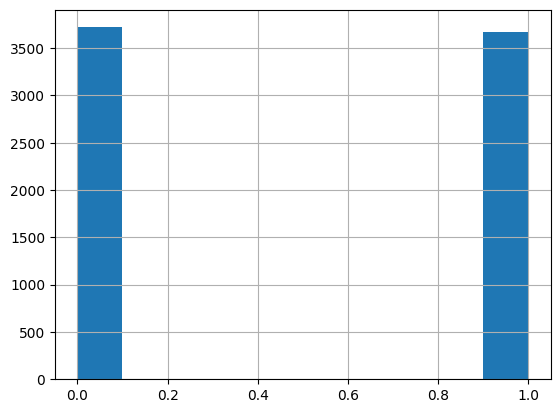

In [27]:
final_ds["Is FanOut"].hist()